In [5]:
## Library import 

import numpy as np
import pandas as pd
import yfinance as yf
import requests
import math
from scipy import stats
import xlsxwriter 
import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_data


In [6]:
msft = yf.Ticker('MSFT')
plug = yf.Ticker('PLUG')
print(msft, plug)

msft.history(period='MSFT')



yfinance.Ticker object <MSFT> yfinance.Ticker object <PLUG>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-23,257.880005,261.51001,257.269989,261.149994,21462600,0,0
2021-04-23,257.880005,261.51001,257.269989,261.149994,20123307,0,0


In [7]:
plug.history(period='PLUG')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-23,26.889999,28.139999,26.32,27.98,28087200,0,0
2021-04-23,26.891399,28.135000,26.32,27.98,28143979,0,0


In [8]:
quote_table = si.get_quote_table("PLUG", dict_result=False)
quote_table

,attribute,value
0,1y Target Est,53.75
1,52 Week Range,3.79 - 75.49
2,Ask,28.21 x 900
3,Avg. Volume,3.46267e+07
4,Beta (5Y Monthly),1.54
5,Bid,28.20 x 800
6,Day's Range,26.32 - 28.14
7,EPS (TTM),-1.58
8,Earnings Date,"May 05, 2021 - May 10, 2021"
9,Ex-Dividend Date,NaN


In [10]:
PLUG_weekly= get_data("PLUG", start_date="12/04/2017", end_date="12/04/2019", index_as_date = True, interval="1wk")
PLUG_weekly


,open,high,low,close,adjclose,volume,ticker
2017-12-04,2.58,2.59,2.30,2.41,2.41,17327300,PLUG
2017-12-11,2.43,2.47,2.31,2.36,2.36,15479000,PLUG
2017-12-18,2.37,2.48,2.35,2.42,2.42,15576800,PLUG
2017-12-25,2.41,2.47,2.35,2.36,2.36,11063600,PLUG
2018-01-01,2.38,2.44,2.32,2.36,2.36,10852300,PLUG
...,...,...,...,...,...,...,...
2019-11-04,2.84,2.92,2.55,2.73,2.73,25673800,PLUG
2019-11-11,2.81,3.65,2.77,3.49,3.49,77954700,PLUG
2019-11-18,3.56,3.77,3.29,3.38,3.38,51241000,PLUG
2019-11-25,3.47,4.04,3.42,3.90,3.90,51117900,PLUG


In [16]:
Plug_monthly = get_data("PLUG", start_date="12/04/2017", end_date="12/04/2019", index_as_date = True, interval="1mo")
Plug_monthly

,open,high,low,close,adjclose,volume,ticker
2018-01-01,2.38,2.44,1.89,1.93,1.93,64896300,PLUG
2018-02-01,1.94,2.13,1.53,1.86,1.86,78739300,PLUG
2018-03-01,1.85,2.13,1.76,1.89,1.89,79914300,PLUG
2018-04-01,1.87,2.01,1.71,1.83,1.83,70291000,PLUG
2018-05-01,1.88,2.27,1.80,1.87,1.87,106130200,PLUG
2018-06-01,1.89,2.05,1.78,2.02,2.02,65046400,PLUG
2018-07-01,2.00,2.20,1.90,2.00,2.00,49843600,PLUG
2018-08-01,2.00,2.10,1.83,1.97,1.97,58413700,PLUG
2018-09-01,2.00,2.05,1.72,1.92,1.92,51814900,PLUG
2018-10-01,1.92,1.98,1.72,1.85,1.85,52269500,PLUG


In [18]:
#Percent change
date_range = pd.period_range("01-2018", "2020-12", freq='M')
df= pd.DataFrame({"PLUG" : np.random.rand(len(date_range))}, index=date_range)
df['pct_pop'] = df['PLUG'].pct_change()
df['pct_yoy'] = df['PLUG']. pct_change(12)
df

,PLUG,pct_pop,pct_yoy
2018-01,0.385383,NaN,NaN
2018-02,0.662577,0.719266,NaN
2018-03,0.852003,0.285894,NaN
2018-04,0.653789,-0.232645,NaN
2018-05,0.924075,0.413414,NaN
2018-06,0.080062,-0.913360,NaN
2018-07,0.007668,-0.904219,NaN
2018-08,0.541954,69.673424,NaN
2018-09,0.369686,-0.317864,NaN
2018-10,0.912726,1.468923,NaN


In [21]:
dow_list = si.tickers_dow()
print("Tickers in Dow Jones:", len(dow_list))
dow_list[0:20]

Tickers in Dow Jones: 30


['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM']

In [22]:
dow_historical = {}
for ticker in dow_list:
    dow_historical[ticker] = si.get_data(ticker, start_date="01/01/2020", end_date="01/03/2020", interval="1d")
dow_historical

{'AAPL':                  open       high        low      close   adjclose     volume  \
 2020-01-02  74.059998  75.150002  73.797501  75.087502  74.333511  135480400   
 
            ticker  
 2020-01-02   AAPL  ,
 'AMGN':              open        high         low       close    adjclose   volume  \
 2020-01-02  243.0  243.190002  238.979996  240.100006  231.917572  2088000   
 
            ticker  
 2020-01-02   AMGN  ,
 'AXP':                   open        high         low       close    adjclose  \
 2020-01-02  124.660004  126.269997  124.230003  125.849998  123.267235   
 
              volume ticker  
 2020-01-02  2708000    AXP  ,
 'BA':                   open        high         low       close    adjclose  \
 2020-01-02  328.549988  333.350006  327.700012  333.320007  331.348572   
 
              volume ticker  
 2020-01-02  4544400     BA  ,
 'CAT':              open        high         low       close  adjclose   volume  \
 2020-01-02  149.0  150.550003  147.979996  150.529

In [24]:
quote_table = si.get_quote_table("NKE", dict_result=False)
quote_table

,attribute,value
0,1y Target Est,163.68
1,52 Week Range,84.11 - 147.95
2,Ask,130.19 x 900
3,Avg. Volume,6.81858e+06
4,Beta (5Y Monthly),0.88
5,Bid,129.86 x 800
6,Day's Range,128.46 - 130.64
7,EPS (TTM),2.14
8,Earnings Date,"Jun 23, 2021 - Jun 28, 2021"
9,Ex-Dividend Date,"Feb 26, 2021"


In [27]:
#Valuation for Nike
Valuation_nike = si.get_stats_valuation("NKE")
Valuation_nike

,Unnamed: 0,As of Date: 4/25/2021Current,2/28/2021,11/30/2020,8/31/2020,5/31/2020,2/29/2020
0,Market Cap (intraday) 5,205.24B,212.48B,212.15B,175.11B,153.30B,139.20B
1,Enterprise Value 3,205.56B,213.47B,215.64B,179.34B,156.77B,142.62B
2,Trailing P/E,61.12,76.15,79.70,69.93,36.38,31.25
3,Forward P/E 1,32.89,35.09,52.63,49.51,36.50,25.71
4,PEG Ratio (5 yr expected) 1,1.56,1.30,1.99,2.02,3.07,1.81
5,Price/Sales (ttm),5.41,5.62,5.74,4.76,3.82,3.51
6,Price/Book (mrq),17.24,20.00,23.00,21.74,16.98,14.86
7,Enterprise Value/Revenue 3,5.34,20.61,19.18,16.93,24.83,14.12
8,Enterprise Value/EBITDA 7,41.24,119.26,118.03,90.44,-254.91,82.73


In [28]:
#dow jones list valuation for multiple stocks
dow_stats = {}
for ticker in dow_list:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
    dow_stats[ticker] = temp
dow_stats

{'AAPL':                      Attribute Recent
 0      Market Cap (intraday) 5  2.24T
 1           Enterprise Value 3  2.28T
 2                 Trailing P/E  36.20
 3                Forward P/E 1  32.05
 4  PEG Ratio (5 yr expected) 1   3.04
 5            Price/Sales (ttm)   7.92
 6             Price/Book (mrq)  34.05
 7   Enterprise Value/Revenue 3   7.74
 8    Enterprise Value/EBITDA 7  25.76,
 'AMGN':                      Attribute   Recent
 0      Market Cap (intraday) 5  149.01B
 1           Enterprise Value 3  171.35B
 2                 Trailing P/E    20.88
 3                Forward P/E 1    15.34
 4  PEG Ratio (5 yr expected) 1     1.84
 5            Price/Sales (ttm)     5.96
 6             Price/Book (mrq)    15.73
 7   Enterprise Value/Revenue 3     6.74
 8    Enterprise Value/EBITDA 7    13.18,
 'AXP':                      Attribute   Recent
 0      Market Cap (intraday) 5  118.25B
 1           Enterprise Value 3      NaN
 2                 Trailing P/E    23.66
 3         

In [44]:
combined_stats = pd.concat(dow_stats)
combined_stats = combined_stats.reset_index()
combined_stats

,level_0,level_1,Attribute,Recent
0,AAPL,0,Market Cap (intraday) 5,2.24T
1,AAPL,1,Enterprise Value 3,2.28T
2,AAPL,2,Trailing P/E,36.20
3,AAPL,3,Forward P/E 1,32.05
4,AAPL,4,PEG Ratio (5 yr expected) 1,3.04
...,...,...,...,...
265,WMT,4,PEG Ratio (5 yr expected) 1,4.46
266,WMT,5,Price/Sales (ttm),0.71
267,WMT,6,Price/Book (mrq),4.87
268,WMT,7,Enterprise Value/Revenue 3,0.79


In [36]:
combined_stats


,level_0,Attribute,Recent
0,AAPL,Market Cap (intraday) 5,2.24T
1,AAPL,Enterprise Value 3,2.28T
2,AAPL,Trailing P/E,36.20
3,AAPL,Forward P/E 1,32.05
4,AAPL,PEG Ratio (5 yr expected) 1,3.04
...,...,...,...
265,WMT,PEG Ratio (5 yr expected) 1,4.46
266,WMT,Price/Sales (ttm),0.71
267,WMT,Price/Book (mrq),4.87
268,WMT,Enterprise Value/Revenue 3,0.79


,level_0,Attribute,Recent
0,AAPL,Market Cap (intraday) 5,2.24T
1,AAPL,Enterprise Value 3,2.28T
2,AAPL,Trailing P/E,36.20
3,AAPL,Forward P/E 1,32.05
4,AAPL,PEG Ratio (5 yr expected) 1,3.04
...,...,...,...
265,WMT,PEG Ratio (5 yr expected) 1,4.46
266,WMT,Price/Sales (ttm),0.71
267,WMT,Price/Book (mrq),4.87
268,WMT,Enterprise Value/Revenue 3,0.79


In [39]:
#update level_0 = Ticker
combined_stats.columns =["Ticker", "Attribute", "Recent"]
combined_stats

,Ticker,Attribute,Recent
0,AAPL,Market Cap (intraday) 5,2.24T
1,AAPL,Enterprise Value 3,2.28T
2,AAPL,Trailing P/E,36.20
3,AAPL,Forward P/E 1,32.05
4,AAPL,PEG Ratio (5 yr expected) 1,3.04
...,...,...,...
265,WMT,PEG Ratio (5 yr expected) 1,4.46
266,WMT,Price/Sales (ttm),0.71
267,WMT,Price/Book (mrq),4.87
268,WMT,Enterprise Value/Revenue 3,0.79


In [40]:
#PE ratio
pe_ratios = combined_stats[combined_stats["Attribute"]=="Trailing P/E"].reset_index()
pe_ratios

,index,Ticker,Attribute,Recent
0,2,AAPL,Trailing P/E,36.20
1,11,AMGN,Trailing P/E,20.88
2,20,AXP,Trailing P/E,23.66
3,29,BA,Trailing P/E,NaN
4,38,CAT,Trailing P/E,42.14
5,47,CRM,Trailing P/E,53.31
6,56,CSCO,Trailing P/E,21.72
7,65,CVX,Trailing P/E,43.77
8,74,DIS,Trailing P/E,51.22
9,83,DOW,Trailing P/E,23.53


<AxesSubplot:>

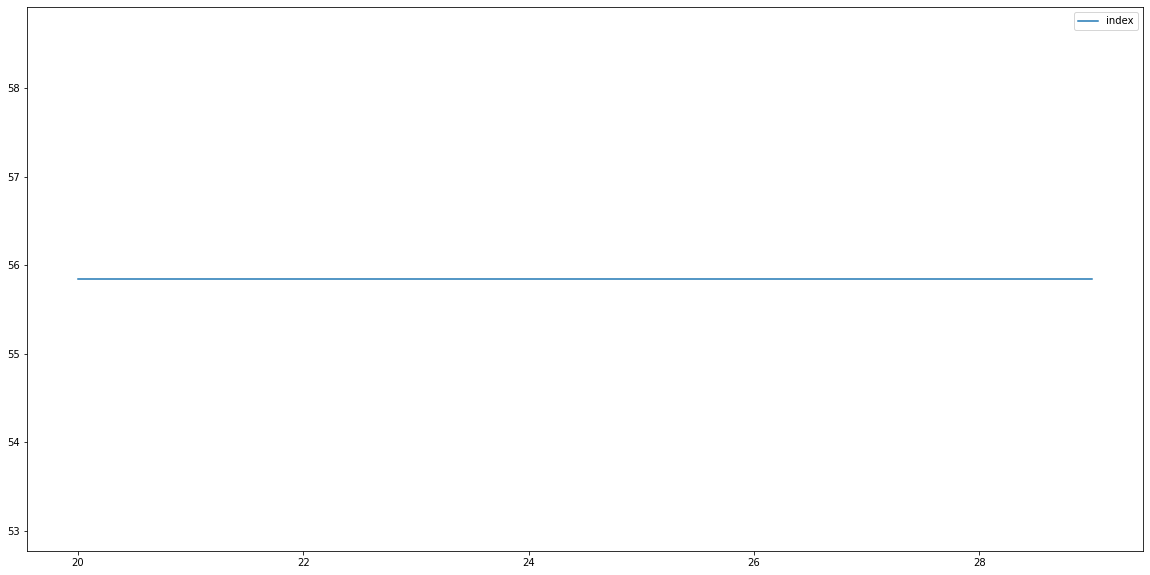